In [10]:
# Import libraries and dependencies
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline



In [11]:
# Set the path of the Harolds Algo trading csv file to be loaded from the Resources folder.
# Define the path name as algo_return_path
algo_return_path = Path("../Module_4_Challenge/Resources/algo_returns.csv")

# Set the path of the Whale Traders csv file to be loaded from the Resources folder.
# Define the path name as whale_return_path
whale_return_path = Path("../Module_4_Challenge/Resources/whale_returns.csv")

# Set the path of the sp_tsx_history csv file to be loaded from the Resources folder.
# Define the path name as sp_tsx_history_path
sp_tsx_history_path = Path("../Module_4_Challenge/Resources/sp_tsx_history.csv")


# Define the path name as for my portfolio shares
google_data = Path("../Module_4_Challenge/Resources/google.csv")
AAL_data = Path("../Module_4_Challenge/Resources/AAL.csv")
TAC_data = Path("../Module_4_Challenge/Resources/TAC.csv")
NVDA_data = Path("../Module_4_Challenge/Resources/NVDA.csv")
TSLA_data = Path("../Module_4_Challenge/Resources/TSLA.csv")

In [12]:
#Reading Whale Return File in Data Frame
whale_return = pd.read_csv(whale_return_path,index_col="Date", parse_dates=True)

#Reading File Formats for issue identtifications issues
print(whale_return.describe())

#Droping NA from Whale Returns 
whale_return = whale_return.dropna().copy()

# Quick review of Whale Retturns
print(whale_return.head())

# Checking null values 
whale_return.isnull().sum()

       SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
count                1059.000000         1059.000000   
mean                    0.000179           -0.000203   
std                     0.007842            0.006977   
min                    -0.032711           -0.032099   
25%                    -0.003594           -0.003961   
50%                     0.000467            0.000000   
75%                     0.004292            0.003567   
max                     0.042977            0.029338   

       TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
count                  1059.000000             1059.000000  
mean                     -0.000081                0.000501  
std                       0.010824                0.012831  
min                      -0.139820               -0.066505  
25%                      -0.004746               -0.005515  
50%                       0.000232                0.000617  
75%                       0.005176                0.007516  
max    

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [13]:
#Reading Algo Return File in Data Frame
algo_return = pd.read_csv(algo_return_path,index_col="Date", parse_dates=True)

#Reading File Formats for issue identtifications issues
print(algo_return.describe())

# Quick review of algo Returns
print(algo_return.head())

#Droping NA from Algo Returns 
algo_return = algo_return.dropna().copy()

# Quick review of Whale Retturns
print(algo_return.head())

# Checking null values 
algo_return.isnull().sum()

            Algo 1       Algo 2
count  1241.000000  1235.000000
mean      0.000667     0.000341
std       0.007972     0.008466
min      -0.030951    -0.036937
25%      -0.003238    -0.003733
50%       0.000135     0.000581
75%       0.003978     0.005194
max       0.098246     0.083734
              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761


Algo 1    0
Algo 2    0
dtype: int64

In [14]:
#Reading sp_tsx_history File in Data Frame
sp_tsx_history = pd.read_csv(sp_tsx_history_path,index_col="Date", parse_dates=True)

#Droping NA from tsx_history Returns 
sp_tsx_history = sp_tsx_history.dropna().copy()

# Quick review of tsx_history Retturns
print(sp_tsx_history.head())

#Reading File Formats for issue identtifications issues
print(sp_tsx_history.describe())

#Fixing formats of the file 
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype(float).copy()

#Validating Changes
sp_tsx_history["Close"].dtype
print(sp_tsx_history.head())

# Checking null values 
sp_tsx_history.isnull().sum()

                 Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99
             Close
count         1818
unique        1814
top     $16,074.30
freq             2
               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99


/Users/saim/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    0
dtype: int64

In [15]:
# Calculating Daily Returns of S&P TSX 60

daily_return_tsx = sp_tsx_history.pct_change()
daily_return_tsx.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Creating a Dataframe to include daily returns for Whales, Algo and S&P TSX 60. 

combined_df = pd.concat([whale_return,algo_return,daily_return_tsx], axis="columns", join="inner")
combined_df.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "HAROLD ALGO 1", "HAROLD ALGO 2", "S&P TSX 60"]
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,HAROLD ALGO 1,HAROLD ALGO 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

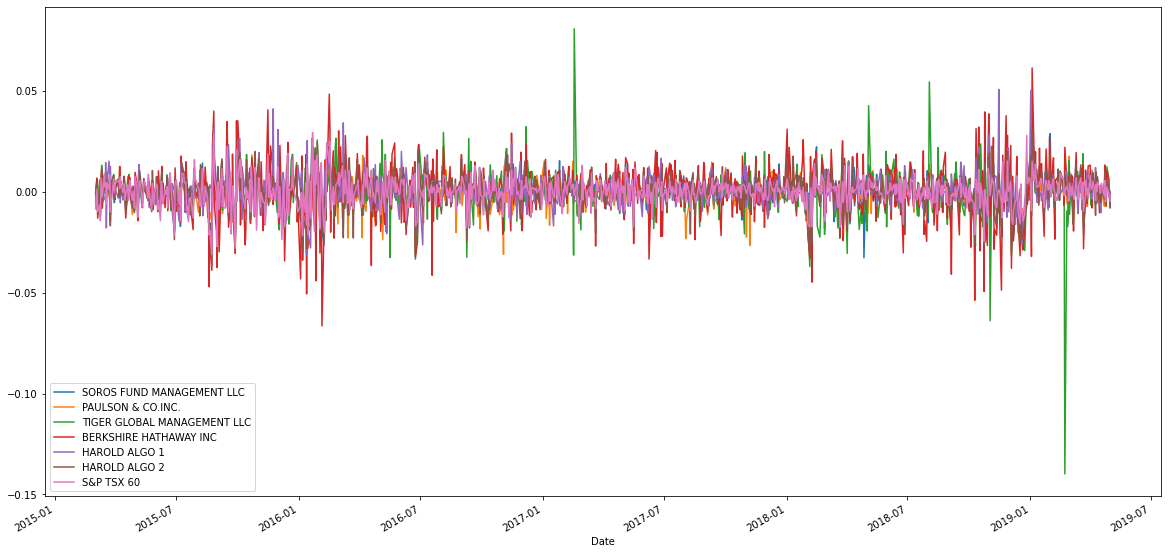

In [17]:
#Calculate and plot daily returns of all portfolios.
combined_df.plot(figsize=(20,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,HAROLD ALGO 1,HAROLD ALGO 2,S&P TSX 60
Date,,,,,,,
2019-05-01,1.120637,0.761096,0.848958,1.354361,2.021865,1.195327,1.065767


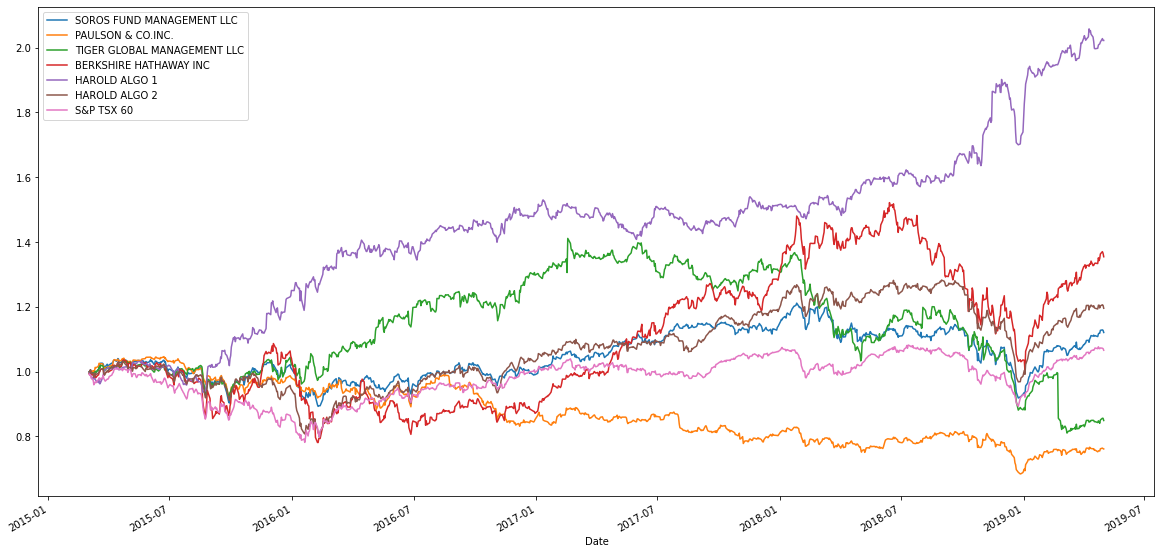

In [18]:
#Calculate and plot cumulative returns for all portfolios.
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10))
cumulative_returns.tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,HAROLD ALGO 1,HAROLD ALGO 2,S&P TSX 60
Date,,,,,,,
2019-05-01,11206.371704,7610.964704,8489.575738,13543.613464,20218.64934,11953.265172,10657.665327


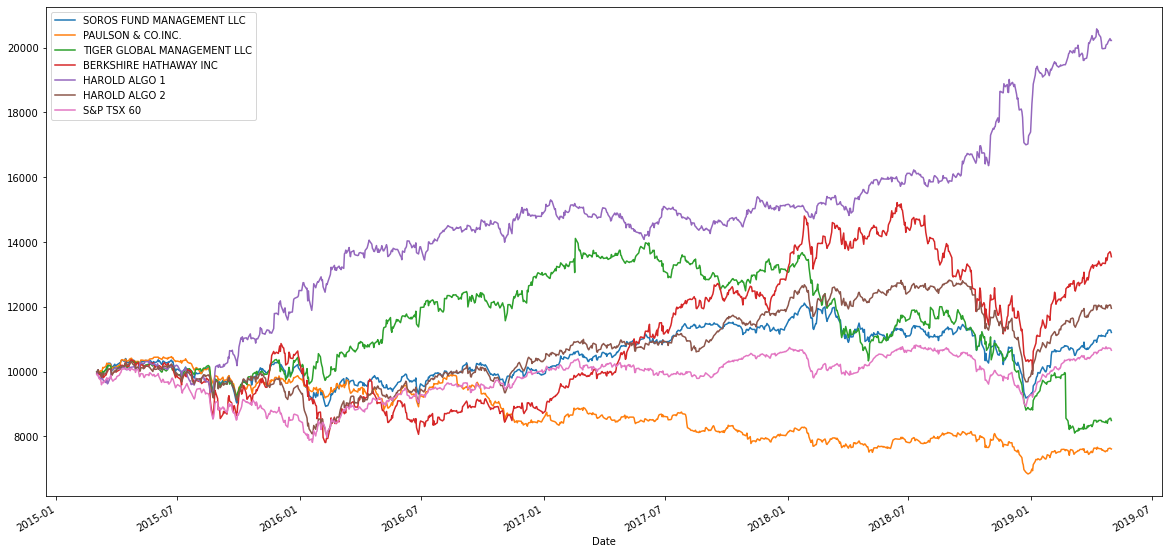

In [19]:
# Set initial investment
initial_investment = 10000

# Compute cumulative returns
cumulative_profit = initial_investment * cumulative_returns

# Plot the returns of the investment
cumulative_profit.plot(figsize=(20,10))

cumulative_profit.tail(1)

<AxesSubplot:>

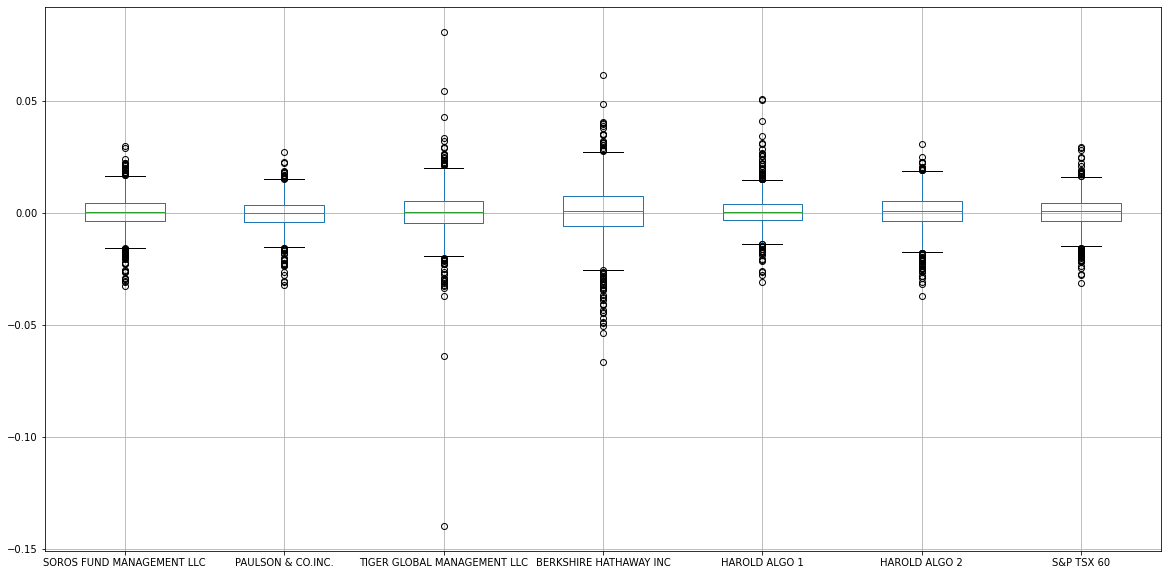

In [20]:
# Box Plot of Returns

combined_df.boxplot(figsize=(20,10))


In [21]:
#Calculate the standard deviation for each portfolio.

combined_df_std = combined_df.std()
combined_df_std = combined_df_std.sort_values(ascending=False)
combined_df_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
HAROLD ALGO 2                  0.008326
SOROS FUND MANAGEMENT LLC      0.007828
HAROLD ALGO 1                  0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [22]:
# PAULSON & CO.INC has lower risk than TSX 60 every thing else is more risky than S&P TSX 60

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
HAROLD ALGO 2                  0.132177
SOROS FUND MANAGEMENT LLC      0.124259
HAROLD ALGO 1                  0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

<AxesSubplot:xlabel='Date'>

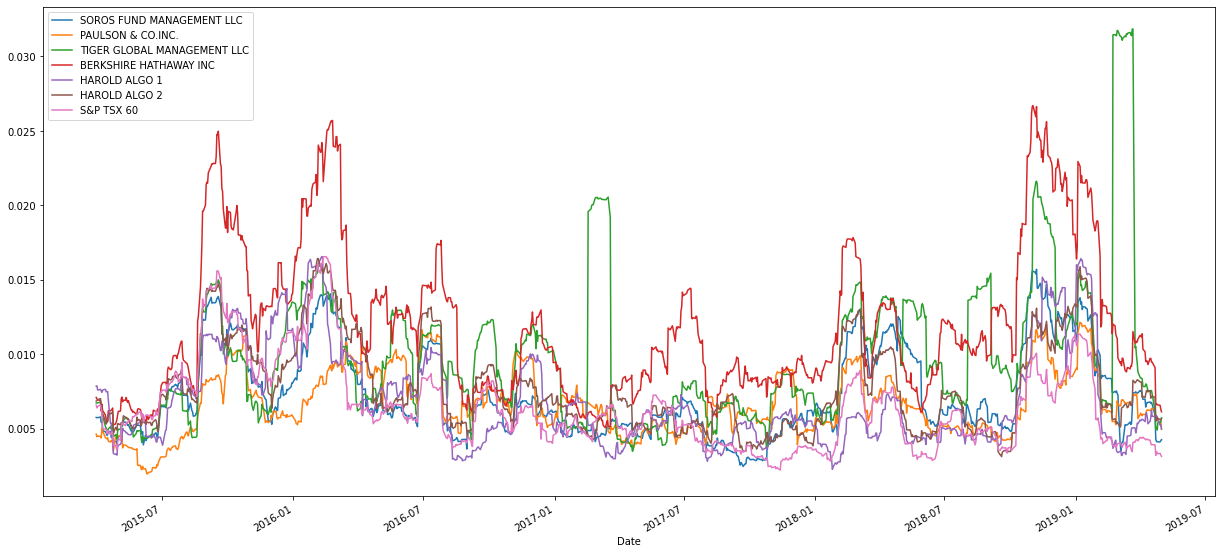

In [24]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.

combined_df.rolling(window=21).std().plot(figsize=(21,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,HAROLD ALGO 1,HAROLD ALGO 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
HAROLD ALGO 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
HAROLD ALGO 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


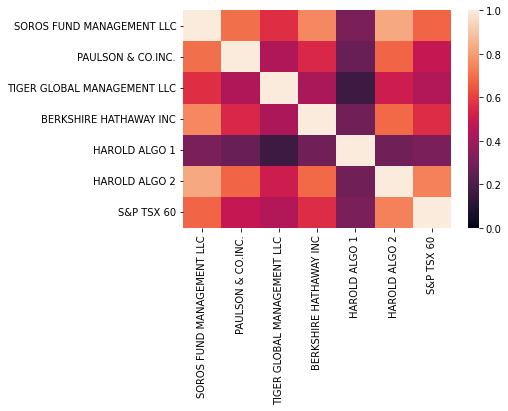

In [25]:
# Calculate the correlation of closing prices between portfolios
price_correlation = combined_df.corr()

# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=0, vmax=1)

# Refer to markdown for analysis

price_correlation



<AxesSubplot:title={'center':'Rolling 60-Day Beta of Harolds Algo_1'}, xlabel='Date'>

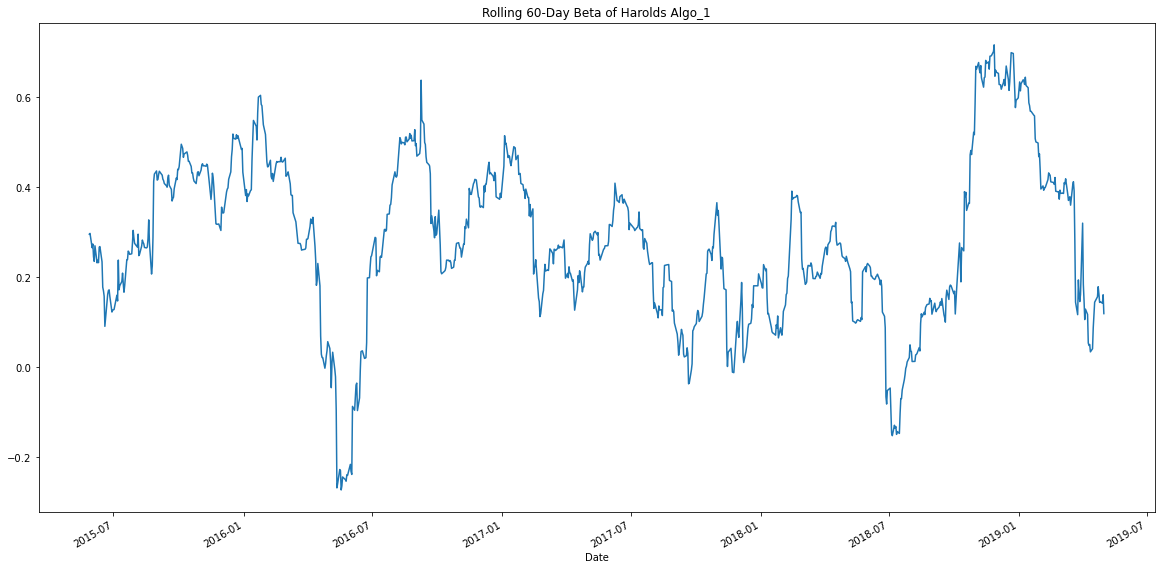

In [26]:
# Choose one portfolio, then calculate and plot its beta as compared to the S&P TSX 60

algo_1 = combined_df

algo_1.drop(columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','HAROLD ALGO 2'])

# Calculating 60 days rolling Covariance between Algo 1 and S&P TSX 60
rolling_covariance = algo_1['HAROLD ALGO 1'].rolling(window=60).cov(algo_1['S&P TSX 60'])
#rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Harolds Algo 1 Returns vs. S&P TSX 60 Returns')

#Calulating 60 days rolling varinace of S&P TSX 60
rolling_variance = algo_1['S&P TSX 60'].rolling(window=60).var()

#Calculating 60 days rolling beta for Algo 1 vs S&P TSX 60 
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Harolds Algo_1')



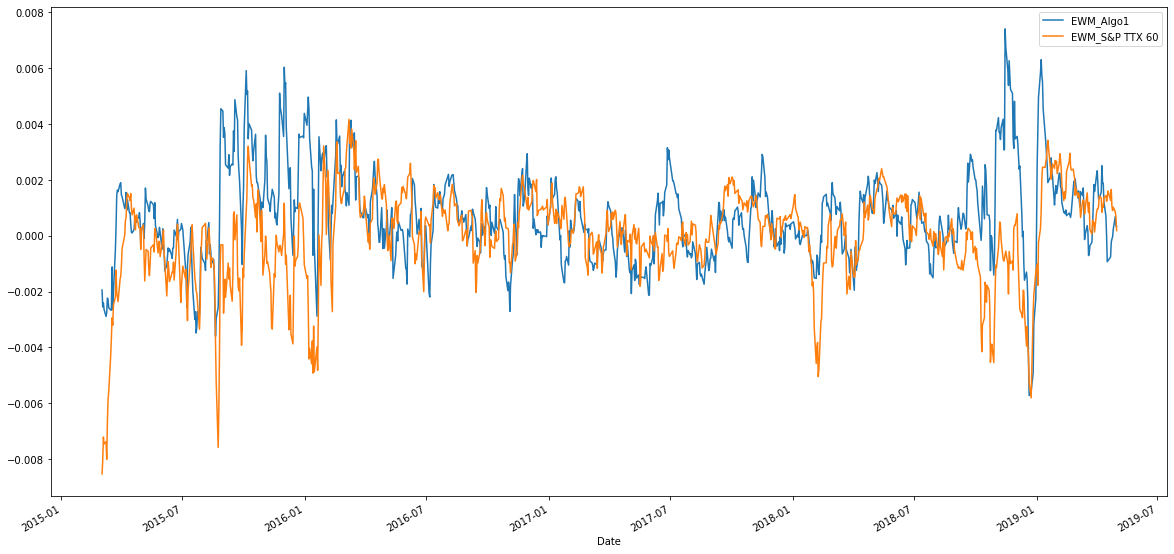

In [27]:
#calculating the ewm with a 21-day half-life.

exponentially_weightted_average_algo_1=algo_1['HAROLD ALGO 1'].ewm(span=21, adjust=False).mean()
exponentially_weightted_average_Spttsx60 =algo_1['S&P TSX 60'].ewm(span=21, adjust=False).mean()

# Plot EWM for HAROLDS Algo_1
ax = exponentially_weightted_average_algo_1.plot()

# Plot EWM for S&P TSX 60
exponentially_weightted_average_Spttsx60.plot(ax=ax, figsize=(20,10))

# Set the legend of the figure
ax.legend(["EWM_Algo1", "EWM_S&P TTX 60"]);

In [28]:
# Calculate sharpe ratio
# Refer to markdown for Analysis of Sharp Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df_std * np.sqrt(252))

sharpe_ratios.sort_values(ascending=False)

HAROLD ALGO 1                  1.491514
BERKSHIRE HATHAWAY INC         0.467045
HAROLD ALGO 2                  0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P TSX 60                     0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

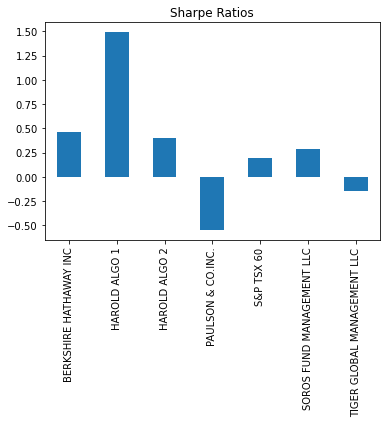

In [29]:
# Plot sharpe ratios using a bar chart

sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [30]:
#Add Portfolio Shares in to data frames
GOOG_df = pd.read_csv(google_data,index_col="Date", parse_dates=True)

# Checking null values 
print(GOOG_df.isnull().sum())

AAL_df = pd.read_csv(AAL_data,index_col="Date", parse_dates=True)
# Checking null values 
print(AAL_df.isnull().sum())


NVDA_df = pd.read_csv(NVDA_data,index_col="Date", parse_dates=True)
# Checking null values 
print(NVDA_df.isnull().sum())

TSLA_df = pd.read_csv(TSLA_data,index_col="Date", parse_dates=True)
# Checking null values 
print(TSLA_df.isnull().sum())

TAC_df = pd.read_csv(TAC_data,index_col="Date", parse_dates=True)
# Checking null values 
print(TAC_df.isnull().sum())

# Merging data into myportfolio dataframe

myportfolio_df = pd.concat([GOOG_df,AAL_df,NVDA_df,TSLA_df,TAC_df], axis="columns", join="inner")

# Renaming Columns
myportfolio_df.columns = ["GOOG", "AAL", "NVDA", "TSLA", "TAC"]

# Check Portfolio Data Frame
myportfolio_df.head()


Close    0
dtype: int64
Close    0
dtype: int64
Close    0
dtype: int64
Close    0
dtype: int64
Close    0
dtype: int64


,GOOG,AAL,NVDA,TSLA,TAC
Date,,,,,
2015-01-02,26.17,53.91,5.03,14.62,9.12
2015-01-05,25.62,53.88,4.95,14.01,9.02
2015-01-06,25.03,53.04,4.80,14.09,8.86
2015-01-07,24.99,53.01,4.78,14.06,9.09
2015-01-08,25.07,53.66,4.97,14.04,9.25


<AxesSubplot:xlabel='Date'>

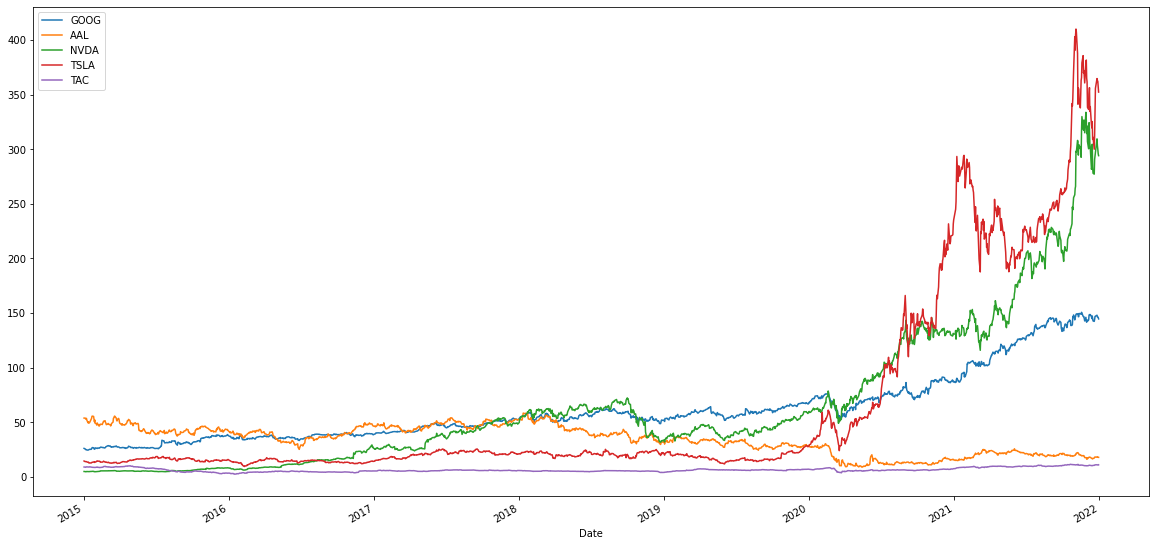

In [31]:
# Sort datetime index in ascending order (past to present)

myportfolio_df = myportfolio_df.sort_index()
# Plot Line graph for portfolio.
myportfolio_df.plot(figsize=(20,10))


<AxesSubplot:xlabel='Date'>

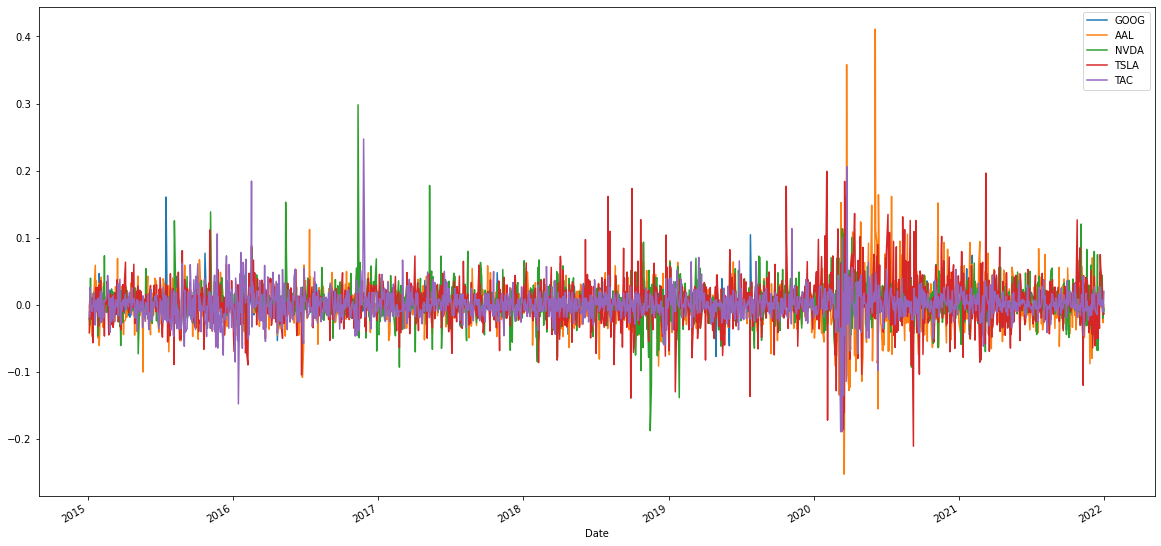

In [32]:
# Use the `pct_change` function to calculate daily returns

daily_returns = myportfolio_df.pct_change()

# Plot line graph for percentage change

daily_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

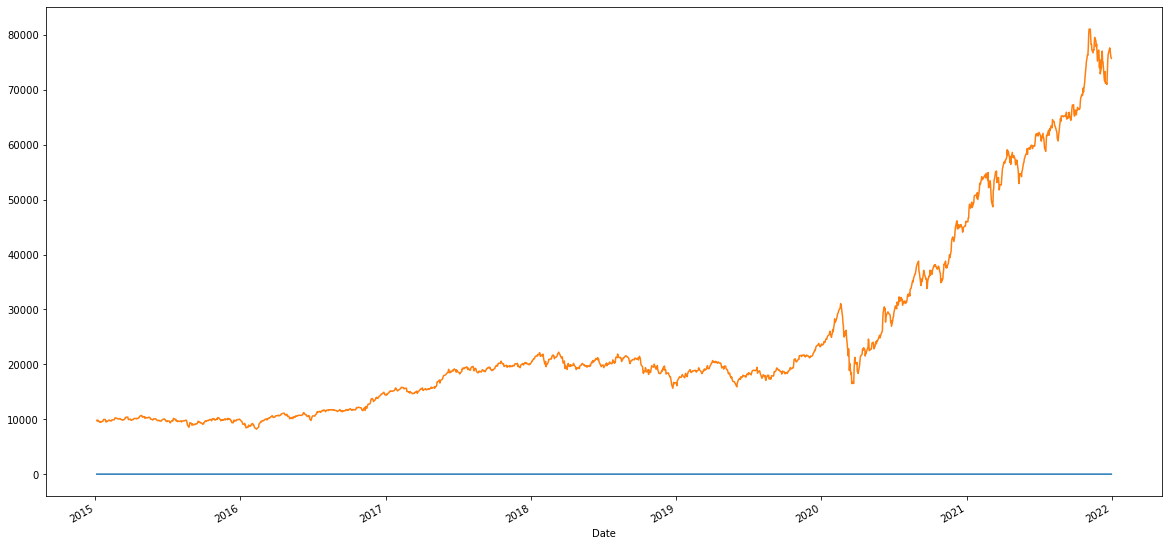

In [33]:
#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.
# Set weights for corresponding of stocks: GOOG, AAL, NVDA, TSLA, ICNL at 20%
weights = [0.20, 0.20, 0.20, 0.20, 0.20]

# Use the `dot` function to sum the product each weight and the corresponding daily return.
myportfolio_returns = daily_returns.dot(weights)

# Diplay sample values
myportfolio_returns.plot()

# Use the `cumprod` function to calculate cumulative returns
mycumulative_returns = (1 + myportfolio_returns).cumprod()

# Display sample values
mycumulative_returns.head()

# Set initial investment
initial_investment = 10000

# Compute cumulative returns
mycumulative_profit = initial_investment * mycumulative_returns

# Plot the returns of the investment
mycumulative_profit.plot(figsize=(20,10))

In [34]:
# Combining my portfolio to Other Portfolios using concate

working_df = pd.concat([myportfolio_returns,combined_df], axis="columns", join="inner")

# Renaming Columns
working_df.columns = ["MY PORTFOLIO","SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "HAROLD ALGO 1", "HAROLD ALGO 2", "S&P TSX 60"]

# Testing Data Frame
working_df.head()


,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,HAROLD ALGO 1,HAROLD ALGO 2,S&P TSX 60
Date,,,,,,,,
2015-03-03,0.001047,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.008017,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.003283,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.011188,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,-0.007708,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [35]:
#Calculate the Annualized Standard Deviation.

# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
portfolio_volatility = working_df.std() * np.sqrt(252)

# Sort values in ascending order
portfolio_volatility = portfolio_volatility.sort_values()

# Display the values
portfolio_volatility

PAULSON & CO.INC.              0.110841
S&P TSX 60                     0.111664
HAROLD ALGO 1                  0.120470
SOROS FUND MANAGEMENT LLC      0.124259
HAROLD ALGO 2                  0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
MY PORTFOLIO                   0.227684
dtype: float64

<AxesSubplot:xlabel='Date'>

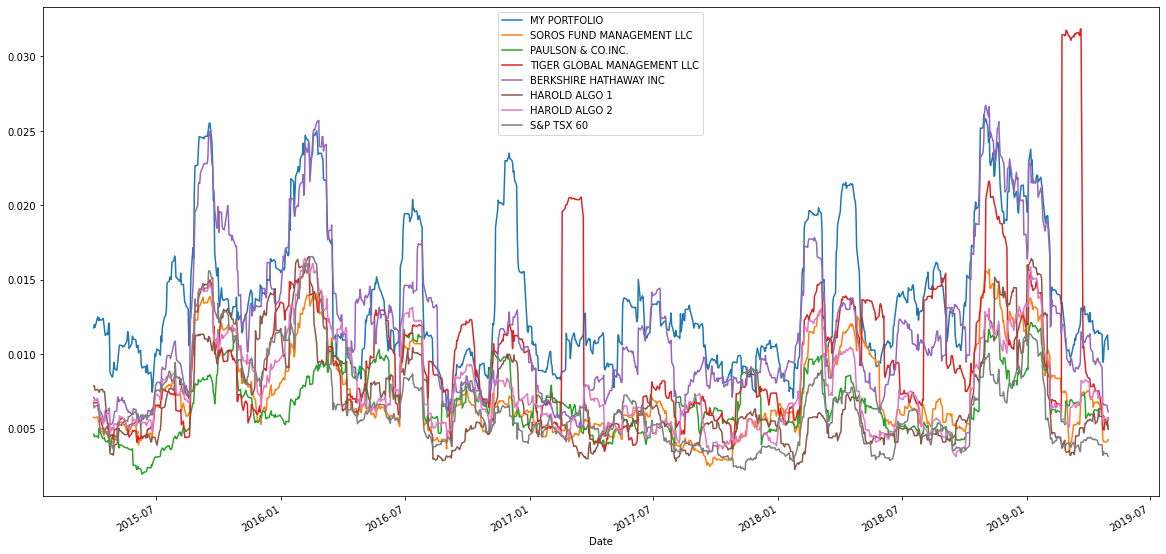

In [36]:
#Calculate and plot rolling std with a 21-day window.

# Plot a rolling 21-day std dev 
working_df.rolling(window=21).std().plot(figsize = (20,10))

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,HAROLD ALGO 1,HAROLD ALGO 2,S&P TSX 60
MY PORTFOLIO,1.000000,0.677740,0.483953,0.452177,0.689388,0.255756,0.677412,0.552033
SOROS FUND MANAGEMENT LLC,0.677740,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.483953,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.452177,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.689388,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
HAROLD ALGO 1,0.255756,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
HAROLD ALGO 2,0.677412,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.552033,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


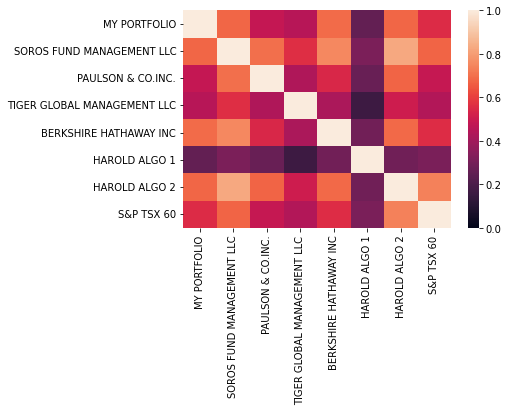

In [37]:
#Calculate and plot the correlation

# Calculate the correlation of daily difference between portfolios
myportfolio_price_correlation = working_df.corr()

# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(myportfolio_price_correlation, vmin=0, vmax=1)

# Display the values
myportfolio_price_correlation


<AxesSubplot:title={'center':'Rolling 60-Day Beta of MYPORTFOLIO vs S&P'}, xlabel='Date'>

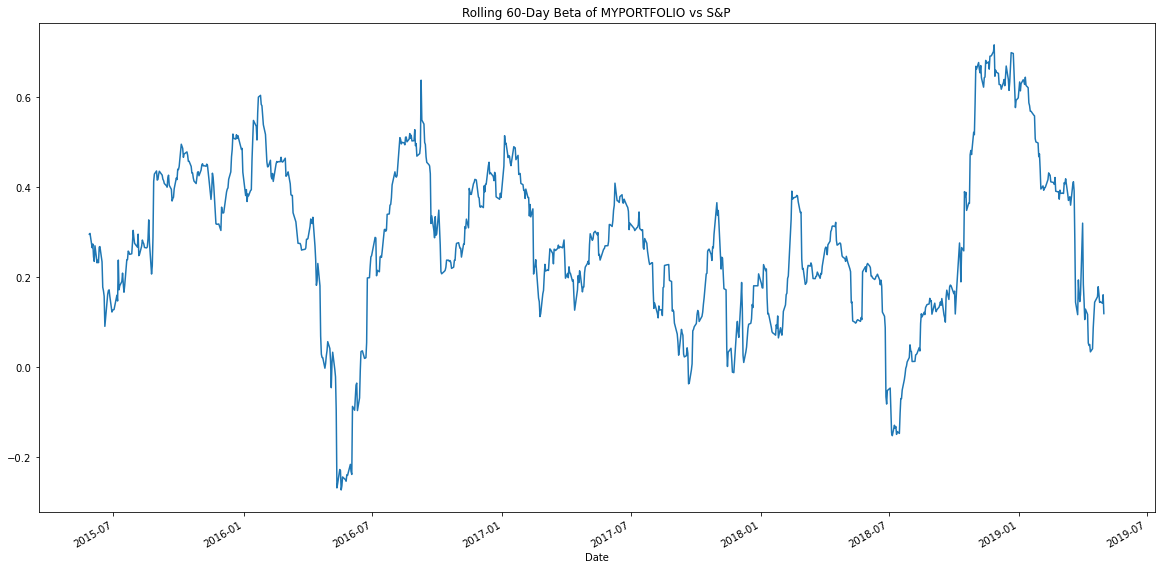

In [38]:
#Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.

# Creating a new data frame for manupulation 
myport_df = working_df

# droping columns not required for Beta Analysis
myport_df.drop(columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','HAROLD ALGO 2', 'HAROLD ALGO 1'])

# Calculating 60 days rolling Covariance between Algo 1 and S&P TSX 60
rolling_covariance_my_port = myport_df['MY PORTFOLIO'].rolling(window=60).cov(myport_df['S&P TSX 60'])

#Calulating 60 days rolling varinace of S&P TSX 60
rolling_variance_my_port = myport_df['S&P TSX 60'].rolling(window=60).var()

#Calculating 60 days rolling beta for MY PORTFOLIO vs S&P TSX 60 
rolling_beta_myportfolio = rolling_covariance_my_port / rolling_variance_my_port

# ploting rolling Beta
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of MYPORTFOLIO vs S&P')



In [39]:
#Calculate the Sharpe ratios and generate a bar plot.
# Calculating Stadard Deviations for combined data frames 
working_df_std = working_df.std()

# Calulating Sharp Ratio
sharpe_ratios_port = (working_df.mean() * 252) / (working_df_std * np.sqrt(252))

# Display Sharp Rattio in assending order
sharpe_ratios_port.sort_values()

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
S&P TSX 60                     0.195550
SOROS FUND MANAGEMENT LLC      0.286709
HAROLD ALGO 2                  0.396817
BERKSHIRE HATHAWAY INC         0.467045
MY PORTFOLIO                   0.727297
HAROLD ALGO 1                  1.491514
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

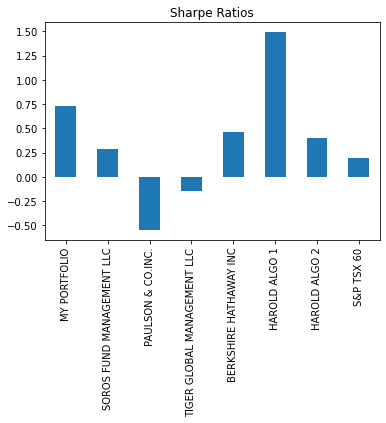

In [40]:
# Ploting Bar Graph for Sharpe Ratios 
sharpe_ratios_port.plot.bar(title="Sharpe Ratios")
